<a href="https://colab.research.google.com/github/LuccaBortoloso/compress_image/blob/main/compress_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mlib_image

from sklearn.utils import shuffle
from sklearn.cluster import KMeans

# Functions

In [ ]:
def recreate_img(c, labels, w, h, d):
  image = np.zeros((w,h,d))
  idx=0

  for i in range(w):
    for j in range(h):
      image[i][j] = c[labels[idx]]
      idx+=1
  
  return image

# Read image

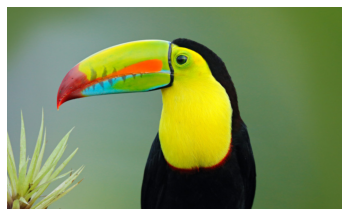

In [ ]:
img = cv2.imread('/content/tucano.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
print(img.shape)

(500, 830, 3)


# Transform image

In [ ]:
w, h, d = img.shape
img_array = img.reshape(w*h, d)

print(img_array.shape)

(415000, 3)


In [ ]:
img_array = img_array / 255

In [ ]:
img_array

array([[0.35294118, 0.4745098 , 0.24313725],
       [0.35294118, 0.4745098 , 0.24313725],
       [0.34901961, 0.47058824, 0.23921569],
       ...,
       [0.31372549, 0.43529412, 0.16862745],
       [0.31372549, 0.43529412, 0.16862745],
       [0.31372549, 0.43529412, 0.17254902]])

# Creating a sample

In [ ]:
sample = shuffle(img_array, random_state=42)[:1000]
print(sample.size)

3000


# Clustering

In [ ]:
kmeans = KMeans(n_clusters=13, random_state=42)
kmeans.fit(sample)

KMeans(n_clusters=13, random_state=42)

In [ ]:
labels = kmeans.predict(img_array)
labels

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [ ]:
print(kmeans.cluster_centers_)
c = kmeans.cluster_centers_

[[0.51789344 0.61346884 0.56677959]
 [0.33937641 0.46205936 0.20081431]
 [0.7544757  0.86462063 0.24927536]
 [0.04836601 0.0509035  0.05997693]
 [0.45910364 0.57469655 0.46184251]
 [0.87957915 0.85786705 0.03696796]
 [0.55859285 0.6532872  0.05490196]
 [0.64153958 0.7037037  0.4087146 ]
 [0.885918   0.45311943 0.05347594]
 [0.60784314 0.17285068 0.08476621]
 [0.75384615 0.80859729 0.61402715]
 [0.39206824 0.51332669 0.32159078]
 [0.12156863 0.69176471 0.76      ]]


# Show original image and compressed image

In [ ]:
compressed_img = recreate_img(c,labels,w,h,d)

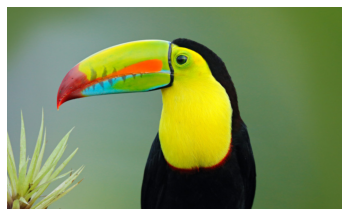

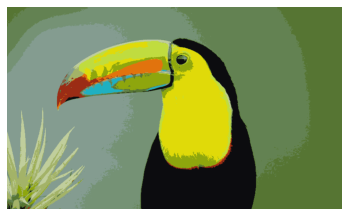

In [ ]:
plt.imshow(img)
plt.axis('off')
plt.show()

plt.imshow(compressed_img)
plt.axis('off')
plt.show()

# Save image and show the archive size

In [ ]:
mlib_image.imsave('tucano_compressed.jpg', compressed_img)

In [ ]:
print(f"Original image size: {os.path.getsize('tucano.jpg')} bytes")
print(f"Compressed image size: {os.path.getsize('tucano_compressed.jpg')} bytes")

Original image size: 82814 bytes
Compressed image size: 28909 bytes
